## 24W-COM SCI-M148 Project 2 - Binary Classification Comparative Methods

Name: Krish Patel

UID: 605 796 227

### **Submission Guidelines**
1. Please fill in your name and UID above.

2. Please submit a **PDF printout** of your Jupyter Notebook to **Gradescope**. If you have any trouble accessing Gradescope, please let a TA know ASAP.  

3. As the PDF can get long, please tag the respective sections to ensure the readers know where to look.  

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results.

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance.

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed.

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions

In [1]:
#Here are a set of libraries we imported to complete this assignment.
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph
import os
import subprocess
subprocess.run('python3 -m pip install scikit-learn', shell=True)
subprocess.run('python3 -m pip install seaborn', shell=True)
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random

random.seed(42)


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


## Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [2]:
data = pd.read_csv('heartdisease.csv')

### Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method,  the describe method, and the info method to display some of the rows so we can visualize the types of data fields we'll be working with.

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


### Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe. (hint: try label encoder or .astype()

In [6]:

data['sick'] = data['sick'].astype(int)
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


### Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient?

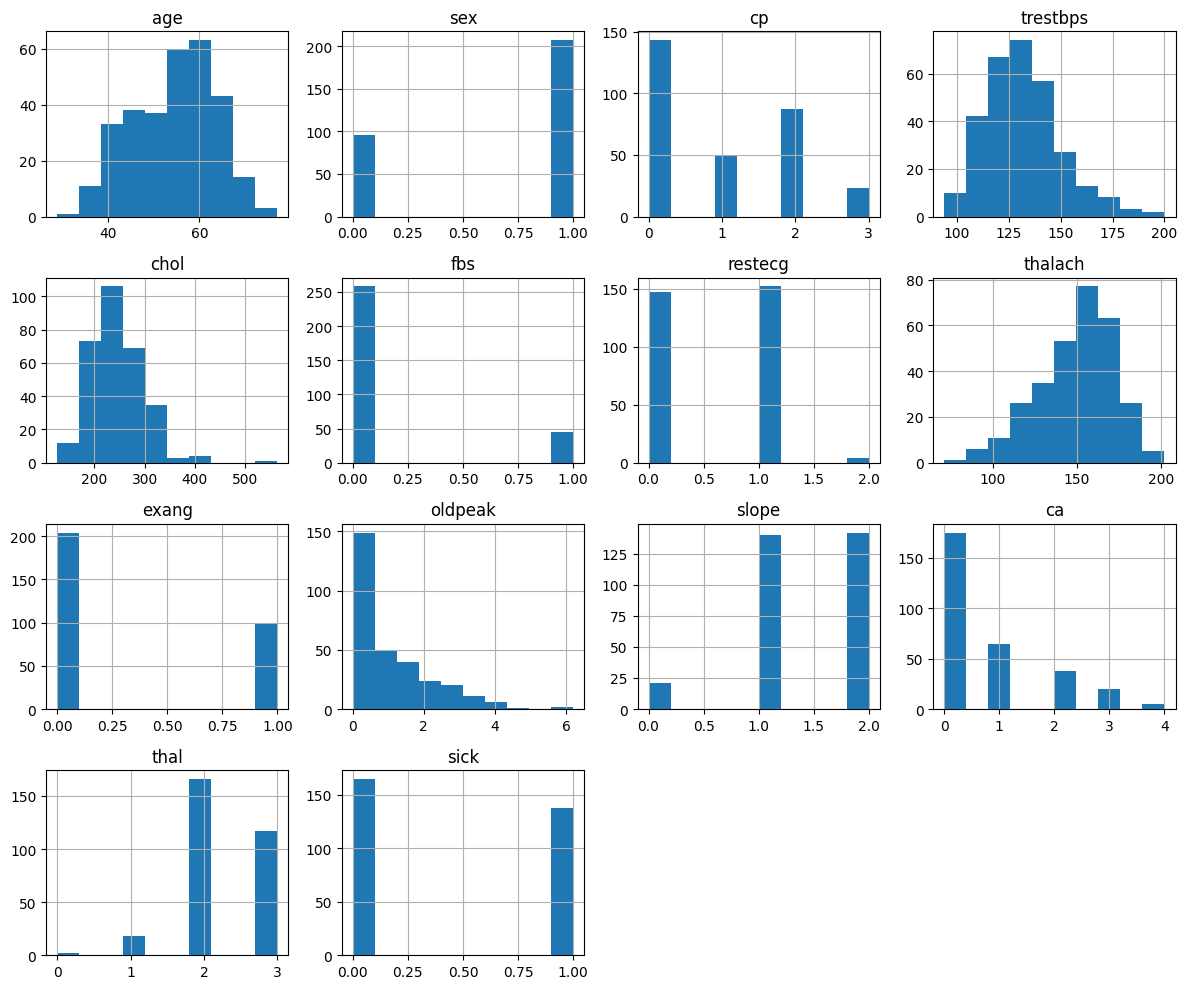

In [7]:
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


### We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results:

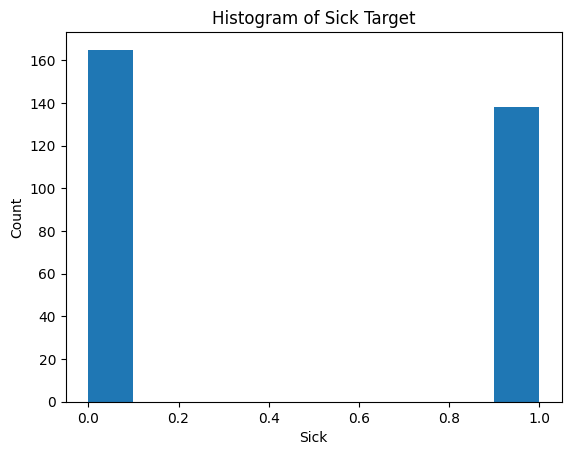

Number of sick individuals: 138
Number of healthy individuals: 165


In [8]:


plt.hist(data['sick'])
plt.xlabel('Sick')
plt.ylabel('Count')
plt.title('Histogram of Sick Target')
plt.show()

sick_count = data['sick'].sum()
healthy_count = len(data) - sick_count

print(f"Number of sick individuals: {sick_count}")
print(f"Number of healthy individuals: {healthy_count}")


### Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

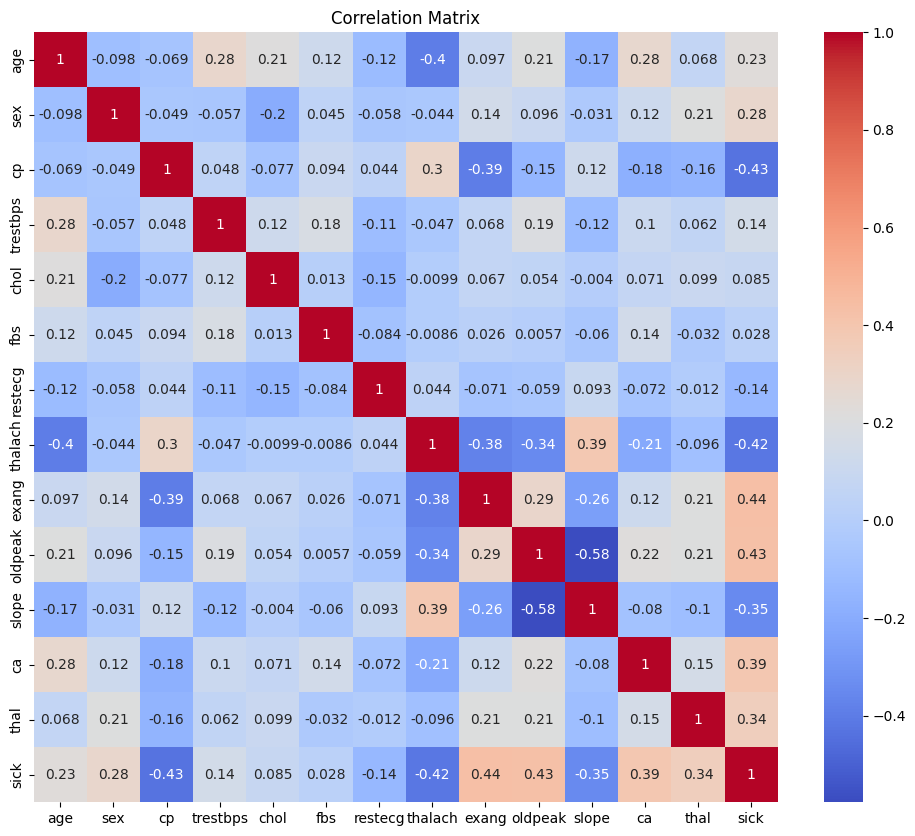

In [9]:
import seaborn as sns

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


A negatively correlation indicates that a change in one of the factor would cause the other feature to decrease on average by the correlating factor times the coefficient. A correlation of zero means that a feature is not correlated with another feature(has no effect seen with the given samples of data), and a strong positive value suggests that an incrase in the value of one feature would icnrasae the value of another feature(on average). The Diagonal Matrix is populated with values 1 as an increase in a feature would cause the same increase in the same feature. According to the above matrix, here are the breakdowns of large correlations:

Correlations with Sickness(Heart Disease):

CP is negatively correlated with sick, indicating that those with sickness are less likely to show signs of chest pain. Thalach is also negatively correlated with sickness, suggesting that the presence of a Heart disease would mean there is a lower chance of having a higher heart rate(or the maximum achievable heart rate .)

However, Heart Disease or CP is also positively correlated with exang(Exercise Induced Angina) which makes sense as it is a heart condition . Depression induced by execise relative to rest is also higher with presence of a heart disease, as well as Number of major vessels colored by flouroscopy and teh seriousness of teh defect (thal)

Along with that sickness is also correlated to sex, indicating that males are more likely to develop heart diseases than women 

Correlations with CA (Major vessels colored by flouroscopy):

Age is positively correlated with CA, suggesting that older individuals may have a higher number of major vessels colored by fluoroscopy 

Correlations with slope:

Thalach is positively correlated with Slope, suggesting that the slope of the peak exercise ST segment would higher in people who can achieve a higher maximum achievable heart rate

Slope is also negatively correlated with oldpeakST, whic would a lot of sense as slope is the slope of peak exercise ST segment.

Correlations with oldpeak: 

Thalach is also correlated with oldpeakST, which would be observed due to a negative correlation between slope and Thalach

Correlations with Exang(Exercise Induced Angina):

Exang is negatively correlated with thalach and chest pain, and this would make sense as thalach is also positively correlated to chest pain. Thus an increase in Exang, where (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina) would suggest that the maximum heart rate achieved would be higher in individuals who are asymptomatic /have atypical angina compared to individuals who lie higher on the scale.

Correlations with Thalach(Maximum heart rate achieved):

Thalach is negatively correlated with age, sugggesting that older people have a reduced heartrate peak(have a lower maximum heart rate achieved)

Thalach is positively correlated with chest pain, suggesting that individuals who have a higher achievable heart rate have a higher chance of getting chest pain.


Correlations with trestbs:(Resting blood pressure)

Age is positively correlated with Resting blood pressure, suggesting that older individuals are more likely to have a higher resting blood pressure than younger individuals




## Part 2. Prepare the 'Raw' Data and run a KNN Model

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Save the label column as a separate array and then drop it from the dataframe.

In [10]:
y_raw = data['sick']
X_raw = data.drop('sick', axis=1)

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.3, random_state=42)


### First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 70% of your total dataframe (hint: use the train_test_split() method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [11]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.3, random_state=42)


In [12]:
print(X_train_raw.shape)    
print(X_test_raw.shape)
print(y_train_raw.shape)
print(y_test_raw.shape)

(212, 13)
(91, 13)
(212,)
(91,)


### We'll explore how not processing your data can impact model performance by using the K-Nearest Neighbor classifier. One thing to note was because KNN's rely on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our raw data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [13]:

knn = KNeighborsClassifier()
knn.fit(X_train_raw, y_train_raw)
y_pred_raw = knn.predict(X_test_raw)


accuracy_raw = knn.score(X_test_raw, y_test_raw)
print("Accuracy:", accuracy_raw)
precision_raw = metrics.precision_score(y_test_raw, y_pred_raw)
print("Precision:", precision_raw)
recall_raw = metrics.recall_score(y_test_raw, y_pred_raw)
print("Recall:", recall_raw)
f1_raw = metrics.f1_score(y_test_raw, y_pred_raw)
print("F1 Score:", f1_raw)



Accuracy: 0.6593406593406593
Precision: 0.631578947368421
Recall: 0.5853658536585366
F1 Score: 0.6075949367088608


### Now implement a pipeline of your choice. You can opt to handle categoricals however you wish, however please scale your numeric features using standard scaler. Use the fit_transform() to fit this pipeline to your training data. and then transform() to apply that pipeline to your test data

Hint:
1. Create separate pipelines for numeric and categorical features with Pipeline() and then combining them with ColumnTransformer()
2. First, fit the full pipeline with the training data. Then, apply it to the test data as well.

### Pipeline:

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_features = X_train_raw.select_dtypes(include=['int64', 'float64']).columns

categorical_features = X_train_raw.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train_processed = preprocessor.fit_transform(X_train_raw)




In [15]:
# Pipeline my test data

X_test_processed = preprocessor.transform(X_test_raw)

### Now retrain your model and compare the accuracy metrics (Accuracy, Precision, Recall, F1 Score) with the raw and pipelined data.

In [16]:

# k-Nearest Neighbors algorithm
knn = KNeighborsClassifier()
knn.fit(X_train_processed, y_train_raw)
y_pred_processed = knn.predict(X_test_processed)



In [17]:
accuracy_processed = knn.score(X_test_processed, y_test_raw)
print("Accuracy:", accuracy_processed)
precision = metrics.precision_score(y_test_raw, y_pred_processed)
print("Precision:", precision)
recall = metrics.recall_score(y_test_raw, y_pred_processed)
print("Recall:", recall)
f1 = metrics.f1_score(y_test_raw, y_pred_processed)
print("F1 Score:", f1)


Accuracy: 0.8681318681318682
Precision: 0.8536585365853658
Recall: 0.8536585365853658
F1 Score: 0.8536585365853658


Old:
Accuracy: 0.6593406593406593
Precision: 0.631578947368421
Recall: 0.5853658536585366
F1 Score: 0.6075949367088608

New:
Accuracy: 0.8681318681318682
Precision: 0.8536585365853658
Recall: 0.8536585365853658
F1 Score: 0.8536585365853658

According to the results above, pipelining significantly improved all matrices, giving almost a 0.2 increase in all domains at minimum. We use two different pipelines here, one for numerical data types and one for categorical. Using the standard scaler for numerical data, we standardize numerical data types which allows for better convergence on the data,  while the onehot encoding encodes categorical features using one hot encoding preventing bias in data ensuring optimal training. This is then combined using the column transformer method, giving us our pre-processed data. According to the explanations of all of these metrics given below, the model is more accurate and precise, and in general is a model than when training the model using the raw data.

### Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 7, 9, 10, 20, and 50. Run your model for each value and report the accuracy for each. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [18]:
n_values = [1, 2, 3, 5, 7, 9, 10, 20, 50]
accuracies = []

for n in n_values:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_processed, y_train_raw)
    accuracy = knn.score(X_test_processed, y_test_raw)
    accuracies.append(accuracy)

for n, accuracy in zip(n_values, accuracies):
    print(f"n_neighbors = {n}: Accuracy = {accuracy}")


n_neighbors = 1: Accuracy = 0.7802197802197802
n_neighbors = 2: Accuracy = 0.7692307692307693
n_neighbors = 3: Accuracy = 0.8351648351648352
n_neighbors = 5: Accuracy = 0.8681318681318682
n_neighbors = 7: Accuracy = 0.8681318681318682
n_neighbors = 9: Accuracy = 0.8351648351648352
n_neighbors = 10: Accuracy = 0.8351648351648352
n_neighbors = 20: Accuracy = 0.8461538461538461
n_neighbors = 50: Accuracy = 0.8351648351648352


## Part 3. Additional Learning Methods

So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods

### Logistic Regression

Let's now try another classifier,one that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model.

### Report metrics for:
1.   Accuracy
2.   Precision
3.   Recall
4.   F1 Score



In [19]:

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_processed, y_train_raw)
y_pred_processed = logreg.predict(X_test_processed)
print("Accuracy:", logreg.score(X_test_processed, y_test_raw))
precision = metrics.precision_score(y_test_raw, y_pred_processed)
recall = metrics.recall_score(y_test_raw, y_pred_processed)
f1 = metrics.f1_score(y_test_raw, y_pred_processed)


print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8131868131868132
Precision: 0.8
Recall: 0.7804878048780488
F1 Score: 0.7901234567901235


### Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

Accuracy as a measure tells us the proportion of true results (both true positives and true negatives) among the total number of cases examined. In the given example, an accuracy of 0.8132 means that approximately 81.32% of the model's predictions are correct. Accuracy is a useful measure when the class distribution is similar, meaning the number of positives and negatives are roughly equal.

Formula: (TP + TN)/(Total No. of Cases)

Precision tells us the proportion of positive identifications that were actually correct. A precision of 0.8 means that when the model predicts a positive result, there's an 80% chance it's correct. Precision is very important in scenarios where the cost of a false positive is high. For example, in email spam detection, a false positive (marking a good email as spam) could mean missing an important email, so high precision is very valuable.

Formula: TP/ (TP + FP)

Recall or sensitivity measures the proportion of actual positives that were identified correctly. A recall of 0.7805 means that the model correctly identifies 78.05% of all actual positives. Recall is significant when the consequences of false negatives are severe. For example, in medical diagnosis of a serious disease, we would prefer to have a high recall to ensure that as many true cases as possible are identified.

Formula: TP / (TP + FN)

The F1 score is the mean of precision and recall. An F1 score of 0.7901 tells us that the model has a balance between precision and recall. This measure is useful when you need to find a balance between precision and recall, and it is useful especially when the class distribution is uneven (when there are many more negatives than positives or vice versa) . The F1 score gives more information than accuracy, especially when there is an uneven class distribution. A use case for this could be in the case in document classification tasks where mis-classification of documents as either false positives or false negatives has similar consequences.

Formula: 2 * (Precision + Recall)/ (Precision + Recall)

### Let's tweak a few settings. First let's set your solver to 'sag', your max_iter= 10, and set penalty = 'none' and rerun your model. Let's see how your results change!

In [20]:
# Logistic Regression
logreg = LogisticRegression(solver='sag', max_iter=10, penalty='none')
logreg.fit(X_train_processed, y_train_raw)
y_pred_processed = logreg.predict(X_test_processed)

accuracy = logreg.score(X_test_processed, y_test_raw)
precision = metrics.precision_score(y_test_raw, y_pred_processed)
recall = metrics.recall_score(y_test_raw, y_pred_processed)
f1 = metrics.f1_score(y_test_raw, y_pred_processed)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7912087912087912
Precision: 0.7619047619047619
Recall: 0.7804878048780488
F1 Score: 0.7710843373493976


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

In [21]:
logreg = LogisticRegression(solver='sag', max_iter=1000, penalty='none')
logreg.fit(X_train_processed, y_train_raw)
y_pred_processed = logreg.predict(X_test_processed)

accuracy = logreg.score(X_test_processed, y_test_raw)
precision = metrics.precision_score(y_test_raw, y_pred_processed)
recall = metrics.recall_score(y_test_raw, y_pred_processed)
f1 = metrics.f1_score(y_test_raw, y_pred_processed)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.8021978021978022
Precision: 0.7804878048780488
Recall: 0.7804878048780488
F1 Score: 0.7804878048780488


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


### Explain what you changed, and why do you think that may have altered the outcome.

By increasing the number of iterations, this would make sure that the gradient descent occurs over a certain number of interations. By increasing max iterations, we perfom more weight and parameter updates and increasing it increases the probability of convergence.

### Rerun your logistic classifier, but modify the penalty = 'l1', solver='liblinear' and again report the results.

In [22]:
# Logistic Regression with penalty='l1' and solver='liblinear'
logreg = LogisticRegression(penalty='l1', solver='liblinear')
logreg.fit(X_train_processed, y_train_raw)
y_pred_processed = logreg.predict(X_test_processed)

accuracy = logreg.score(X_test_processed, y_test_raw)
precision = metrics.precision_score(y_test_raw, y_pred_processed)
recall = metrics.recall_score(y_test_raw, y_pred_processed)
f1 = metrics.f1_score(y_test_raw, y_pred_processed)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8241758241758241
Precision: 0.8048780487804879
Recall: 0.8048780487804879
F1 Score: 0.8048780487804877


### Explain what what the two solver approaches are, and why liblinear may have produced an improved outcome (but not always, and it's ok if your results show otherwise!).

The two solver approaches used here are SAG(Stochastic Gradient Descent) and Liblinear. 
The first solver uses SAG without any regularization, and this is usually used to fit the data as well as possible(allowing for overfitting). However, liblinear with an l1 regularizer uses l1 or lasso regression to regularize, which allows for sparse solutions(coefficients are zero in this case). With a regularizer, we may achieve better results on the test data due to it generalizing well to the training data and not picking up the noise within it, allowing for better and more accurate fitting/classifications.

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [23]:

# SVM
svm = SVC(probability=True)
svm.fit(X_train_processed, y_train_raw)
y_pred_processed = svm.predict(X_test_processed)

accuracy = svm.score(X_test_processed, y_test_raw)
precision = metrics.precision_score(y_test_raw, y_pred_processed)
recall = metrics.recall_score(y_test_raw, y_pred_processed)
f1 = metrics.f1_score(y_test_raw, y_pred_processed)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.8241758241758241
Precision: 0.8048780487804879
Recall: 0.8048780487804879
F1 Score: 0.8048780487804877


### Report the accuracy, precision, recall, F1 Score, of your model, but in addition, plot a Confusion Matrix of your model's performance

recommend using `from sklearn.metrics import ConfusionMatrixDisplay` for this one!


Accuracy: 0.8241758241758241
Precision: 0.8048780487804879
Recall: 0.8048780487804879
F1 Score: 0.8048780487804877


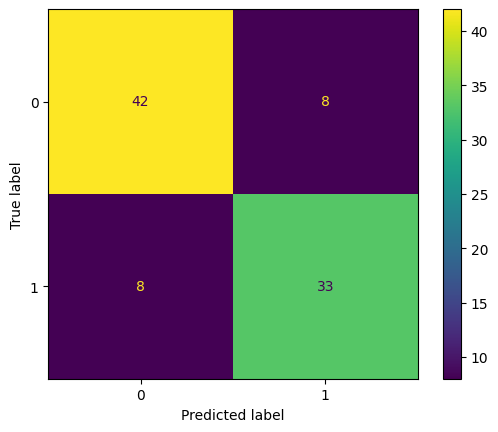

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


accuracy = accuracy_score(y_test_raw, y_pred_processed)
precision = precision_score(y_test_raw, y_pred_processed)
recall = recall_score(y_test_raw, y_pred_processed)
f1 = f1_score(y_test_raw, y_pred_processed)
cm = confusion_matrix(y_test_raw, y_pred_processed)
cm_display = ConfusionMatrixDisplay(cm).plot()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


### Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

recommend using the `metrics.roc_curve` `metrics.auc` and `metrics.RocCurveDisplay` for this one!

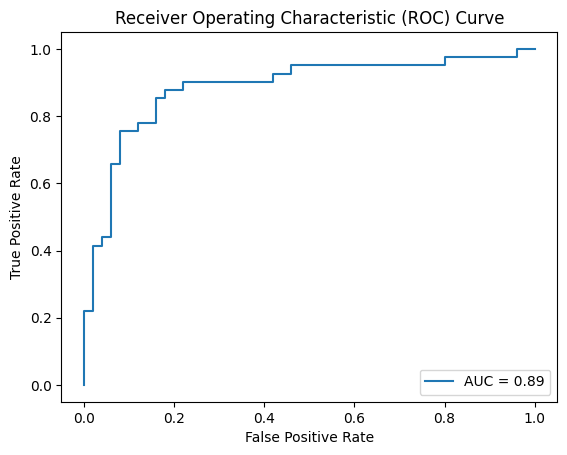

AUC: 0.8853658536585366


In [25]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

y_true = y_test_raw
y_score = svm.decision_function(X_test_processed)
fpr, tpr, thresholds = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_display.plot()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.show()
print('AUC:', roc_auc)


The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test, so the areas under ROC curves are used to compare the usefulness of tests. Here we see a relatively low area under the curve indicating a poorly performing model. An AUC of 0.8853658536585366 suggests that the area under the ROC curve is 0.8853658536585366, implying that the model is performing better than random guessing (closer to 1 the better) and thus has good discriminative ability.

### Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

Accuracy (linear): 0.8131868131868132
Precision (linear): 0.8
Recall (linear): 0.7804878048780488
F1 Score (linear): 0.7901234567901235


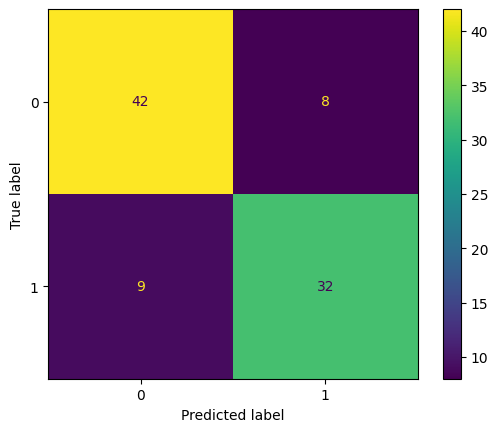

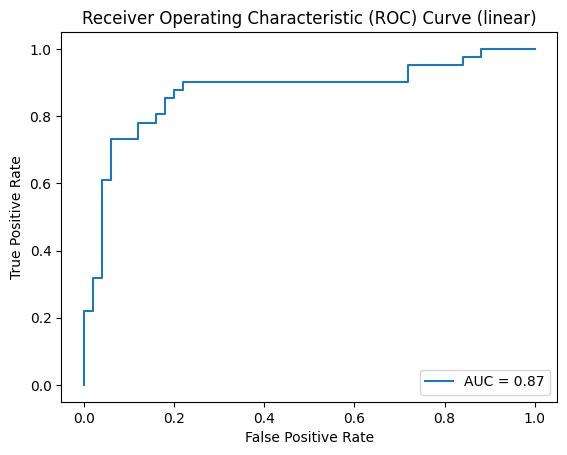

AUC (linear): 0.8731707317073171


In [26]:
# SVM
# SVM with kernel='linear'
svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train_processed, y_train_raw)
y_pred_processed_linear = svm_linear.predict(X_test_processed)

accuracy_linear = accuracy_score(y_test_raw, y_pred_processed_linear)
precision_linear = precision_score(y_test_raw, y_pred_processed_linear)
recall_linear = recall_score(y_test_raw, y_pred_processed_linear)
f1_linear = f1_score(y_test_raw, y_pred_processed_linear)
cm_linear = confusion_matrix(y_test_raw, y_pred_processed_linear)
cm_display_linear = ConfusionMatrixDisplay(cm_linear).plot()

print("Accuracy (linear):", accuracy_linear)
print("Precision (linear):", precision_linear)
print("Recall (linear):", recall_linear)
print("F1 Score (linear):", f1_linear)

y_score_linear = svm_linear.decision_function(X_test_processed)
fpr_linear, tpr_linear, thresholds_linear = roc_curve(y_true, y_score_linear)
roc_auc_linear = auc(fpr_linear, tpr_linear)

roc_display_linear = RocCurveDisplay(fpr=fpr_linear, tpr=tpr_linear, roc_auc=roc_auc_linear)
roc_display_linear.plot()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (linear)')

plt.show()
print('AUC (linear):', roc_auc_linear)


### Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

According to the values above, our Accuracy and Precision are slightly lower than those achieved without the linear kernel, however our Recall and F1 Score are slightly higher than that achieved with the non linear kernel. Using linear, we are using an SVM that uses a linear decision boundary, and thus may not work well with linearly unseparable boundaries. this is not as flexible as the SVMs using non linear kernels. Thus, the linear SVM decision boundary might be slightly more inaccurate due to the data being not linearly separable. As a result, our precision and accuray are slightly lower.

### Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

Logistic regression and linear SVM both aim to classify data with a straight line, but they go about it in different ways. Logistic regression uses a logistic function to output probabilities, while SVM tries to find the widest possible margin between classes. So, while both look for a line to separate data, logistic regression focuses on probability, and SVM prioritizes maximizing the margin between classes.

# Printing Jupyter notebook to PDF

https://piazza.com/class/lr48piooit63hi/post/47 by Steven Bash

It may take a few minutes to run

In [27]:
def colab2pdf():
  ENABLE=True # @param {type:"boolean"}
  if ENABLE:
    !apt-get install librsvg2-bin
    import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
    locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
    NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
    TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
    NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=600)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
    warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)
    with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)
  if not pathlib.Path("/usr/local/bin/quarto").exists():
    !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet
    with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)
    !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
    google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))
colab2pdf()

zsh:1: command not found: apt-get


KeyError: 'COLAB_JUPYTER_IP'